In [78]:
from pathlib import Path
import pandas as pd
import numpy as np
import shogun as sg
from scipy.stats import skew
from scipy import stats
import util
import process

Let's consider Italy first.

In [79]:
from pathlib import Path

path = Path.cwd()
cleaned_data_path = path.parent / 'data' / 'cleaned'

countries = ['austria', 'belgium', 'germany', 'italy', 'netherlands']

# for country in countries :
#     test_data_path = path.parent / 'data' / 'cleaned' / country
#
#     x_train_file_path = test_data_path / 'X_train.csv'
#     y_train_file_path = test_data_path / 'y_train.csv'
#     x_test_file_path = test_data_path / 'X_test.csv'
#     y_test_file_path = test_data_path / 'y_test.csv'
#
#     [country] = pd.read_csv(file_path)

country = 'netherlands'

In [80]:
test_data_path = path.parent / 'data' / 'test' / country
x_train_file_path = test_data_path / 'X_train.csv'
y_train_file_path = test_data_path / 'y_train.csv'
x_test_file_path = test_data_path / 'X_test.csv'
y_test_file_path = test_data_path / 'y_test.csv'

X_train = pd.read_csv(x_train_file_path)
y_train = pd.read_csv(y_train_file_path)
X_test = pd.read_csv(x_test_file_path)
y_test = pd.read_csv(y_test_file_path)

Transformations have been applied, and data is ready.

applying Linear Regression without regularization

In [81]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [82]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [83]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 39.40280373303401
RMSE on Test set : 22.149191551950757


Removing blatant outlier.

In [84]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0])
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0])
y_train = y_train.values.reshape(y_train.shape[0])
y_test = y_test.values.reshape(y_test.shape[0])

for i in range(len(y_test_pred)):
    if y_test_pred[i] < -80:
        y_test_pred = np.delete(y_test_pred, i)
        y_test = np.delete(y_test, i)
        break

y_test_pred.shape

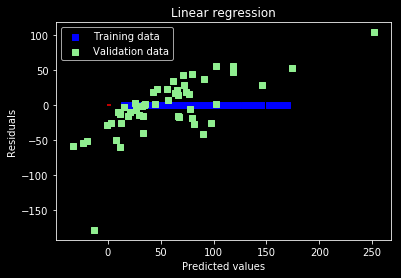

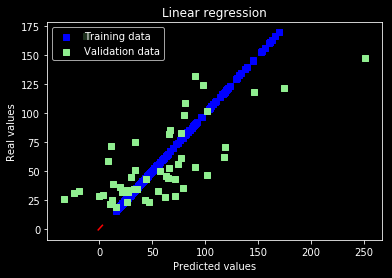

In [85]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -1, xmax = 3, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([-1, 3], [-1, 3], c = "red")
plt.show()

In [86]:
X_train = pd.read_csv(x_train_file_path)
y_train = pd.read_csv(y_train_file_path)
X_test = pd.read_csv(x_test_file_path)
y_test = pd.read_csv(y_test_file_path)

In [87]:
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 84.0
Ridge RMSE on Training set : 26.932635819492294
Ridge RMSE on Test set : 22.43442586370579


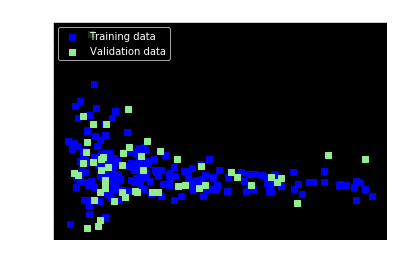

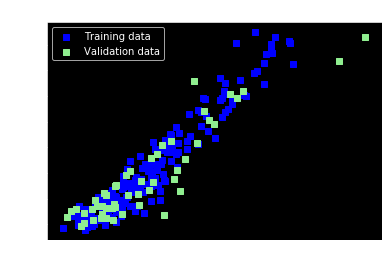

In [88]:
# Plot residuals
plt.scatter(y_train, (y_train_rdg - y_train)/y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, (y_test_rdg - y_test)/y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Relative Residuals")
plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = -1, xmax = 2500, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
# plt.plot([-1, 1100], [-1, 1100], c = "red")
plt.show()
